# Northern Brooklyn KSI Study

### Request: Latest KSI data for the area of Northern Brooklyn 
### Output: Table with fatality and severe injury  counts in Northern Brooklyn



#### 1. Convert the shapefile into a table with geometry
#### 2. Spatial join the shapefile with nysdot_all injury data
#### 3. Retrieve table with injury severity statistics that overlap with selected region


In [4]:
from ris import db2  #library designed for SQL database connection and querying
from ris import pg_import_export_shps as shp # library designed to import shapefiles as tables and export  tables as shapefiles
from IPython.display import clear_output
import datetime 
import pandas as pd
from pandas import DataFrame
import xlsxwriter
import os

clear_output()
timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M')
print 'Notebook run: {}'.format(timestamp)

# %load_ext sql 

Notebook run: 2019-06-19 19:05


### Database connections

In [7]:
pgdb = db2.PostgresDb('dotdevpgsql02', 'GISGRID', quiet = True)
#db = db2.PostgresDb('dotdevpgsql02', 'CRASHDATA', quiet = True)

User name (GISGRID):soge
Password (GISGRID)········


### Exporting study area to pg database


In [ ]:
shp.import_shp_to_pg('C:\Users\soge\Desktop\Jupyter\Shps\Northern_Brooklyn_Study_Area\Study_Area.shp', db, schema='working', precision=False, 
                     permission=True, gdal_data=r"C:\Program Files (x86)\GDAL\gdal-data") 

User name (CRASHDATA):soge
Password (CRASHDATA)········


### Table displaying count by severity for Northern Brooklyn Study Area

In [25]:
q1 = db2.query_to_table(pgdb, """                                
                Select sum(si) Severe_Inj
                from(
                SELECT sum(length(b.ext_of_inj::text) - length(replace(b.ext_of_inj::text, 'A'::text, ''::text))) AS si
                FROM working.study_area a 
                join public.nysdot_all b
                on ST_DWithin(st_setsrid(a.wkb_geometry, 2263), st_setsrid(ST_MakePoint(b.st_x, b.st_y),2263), 2)
                where ext_of_inj is not null
                and (ext_of_inj) like '%A%'
                and b.st_x is not null
                and b.st_y is not null
                group by b.geom
                ) x

                """)
              

### Table displaying count by fatality for Northern Brooklyn Study Area

In [29]:
q2 = db2.query_to_table(pgdb,"""
        SELECT count(geom) Fatalities FROM (
        SELECT b.yr, b.geom
        FROM working.study_area a 
        join public.fatality_nycdot_current b
        on ST_DWithin(st_setsrid(a.wkb_geometry, 2263), st_setsrid(ST_MakePoint(b.st_x, b.st_y),2263), 2)
        ) K""")



### KSI for Northern Brooklyn Area

In [30]:
x = pd.concat([q2,q1],axis=1)
x.rename(index={0:'count'}, inplace=True)
x

,fatalities,severe_inj
count,35,385


### KSI Map for selected region

#### Data Ranging back to 2000
#### Red: Fatality
#### Green: Severe injury

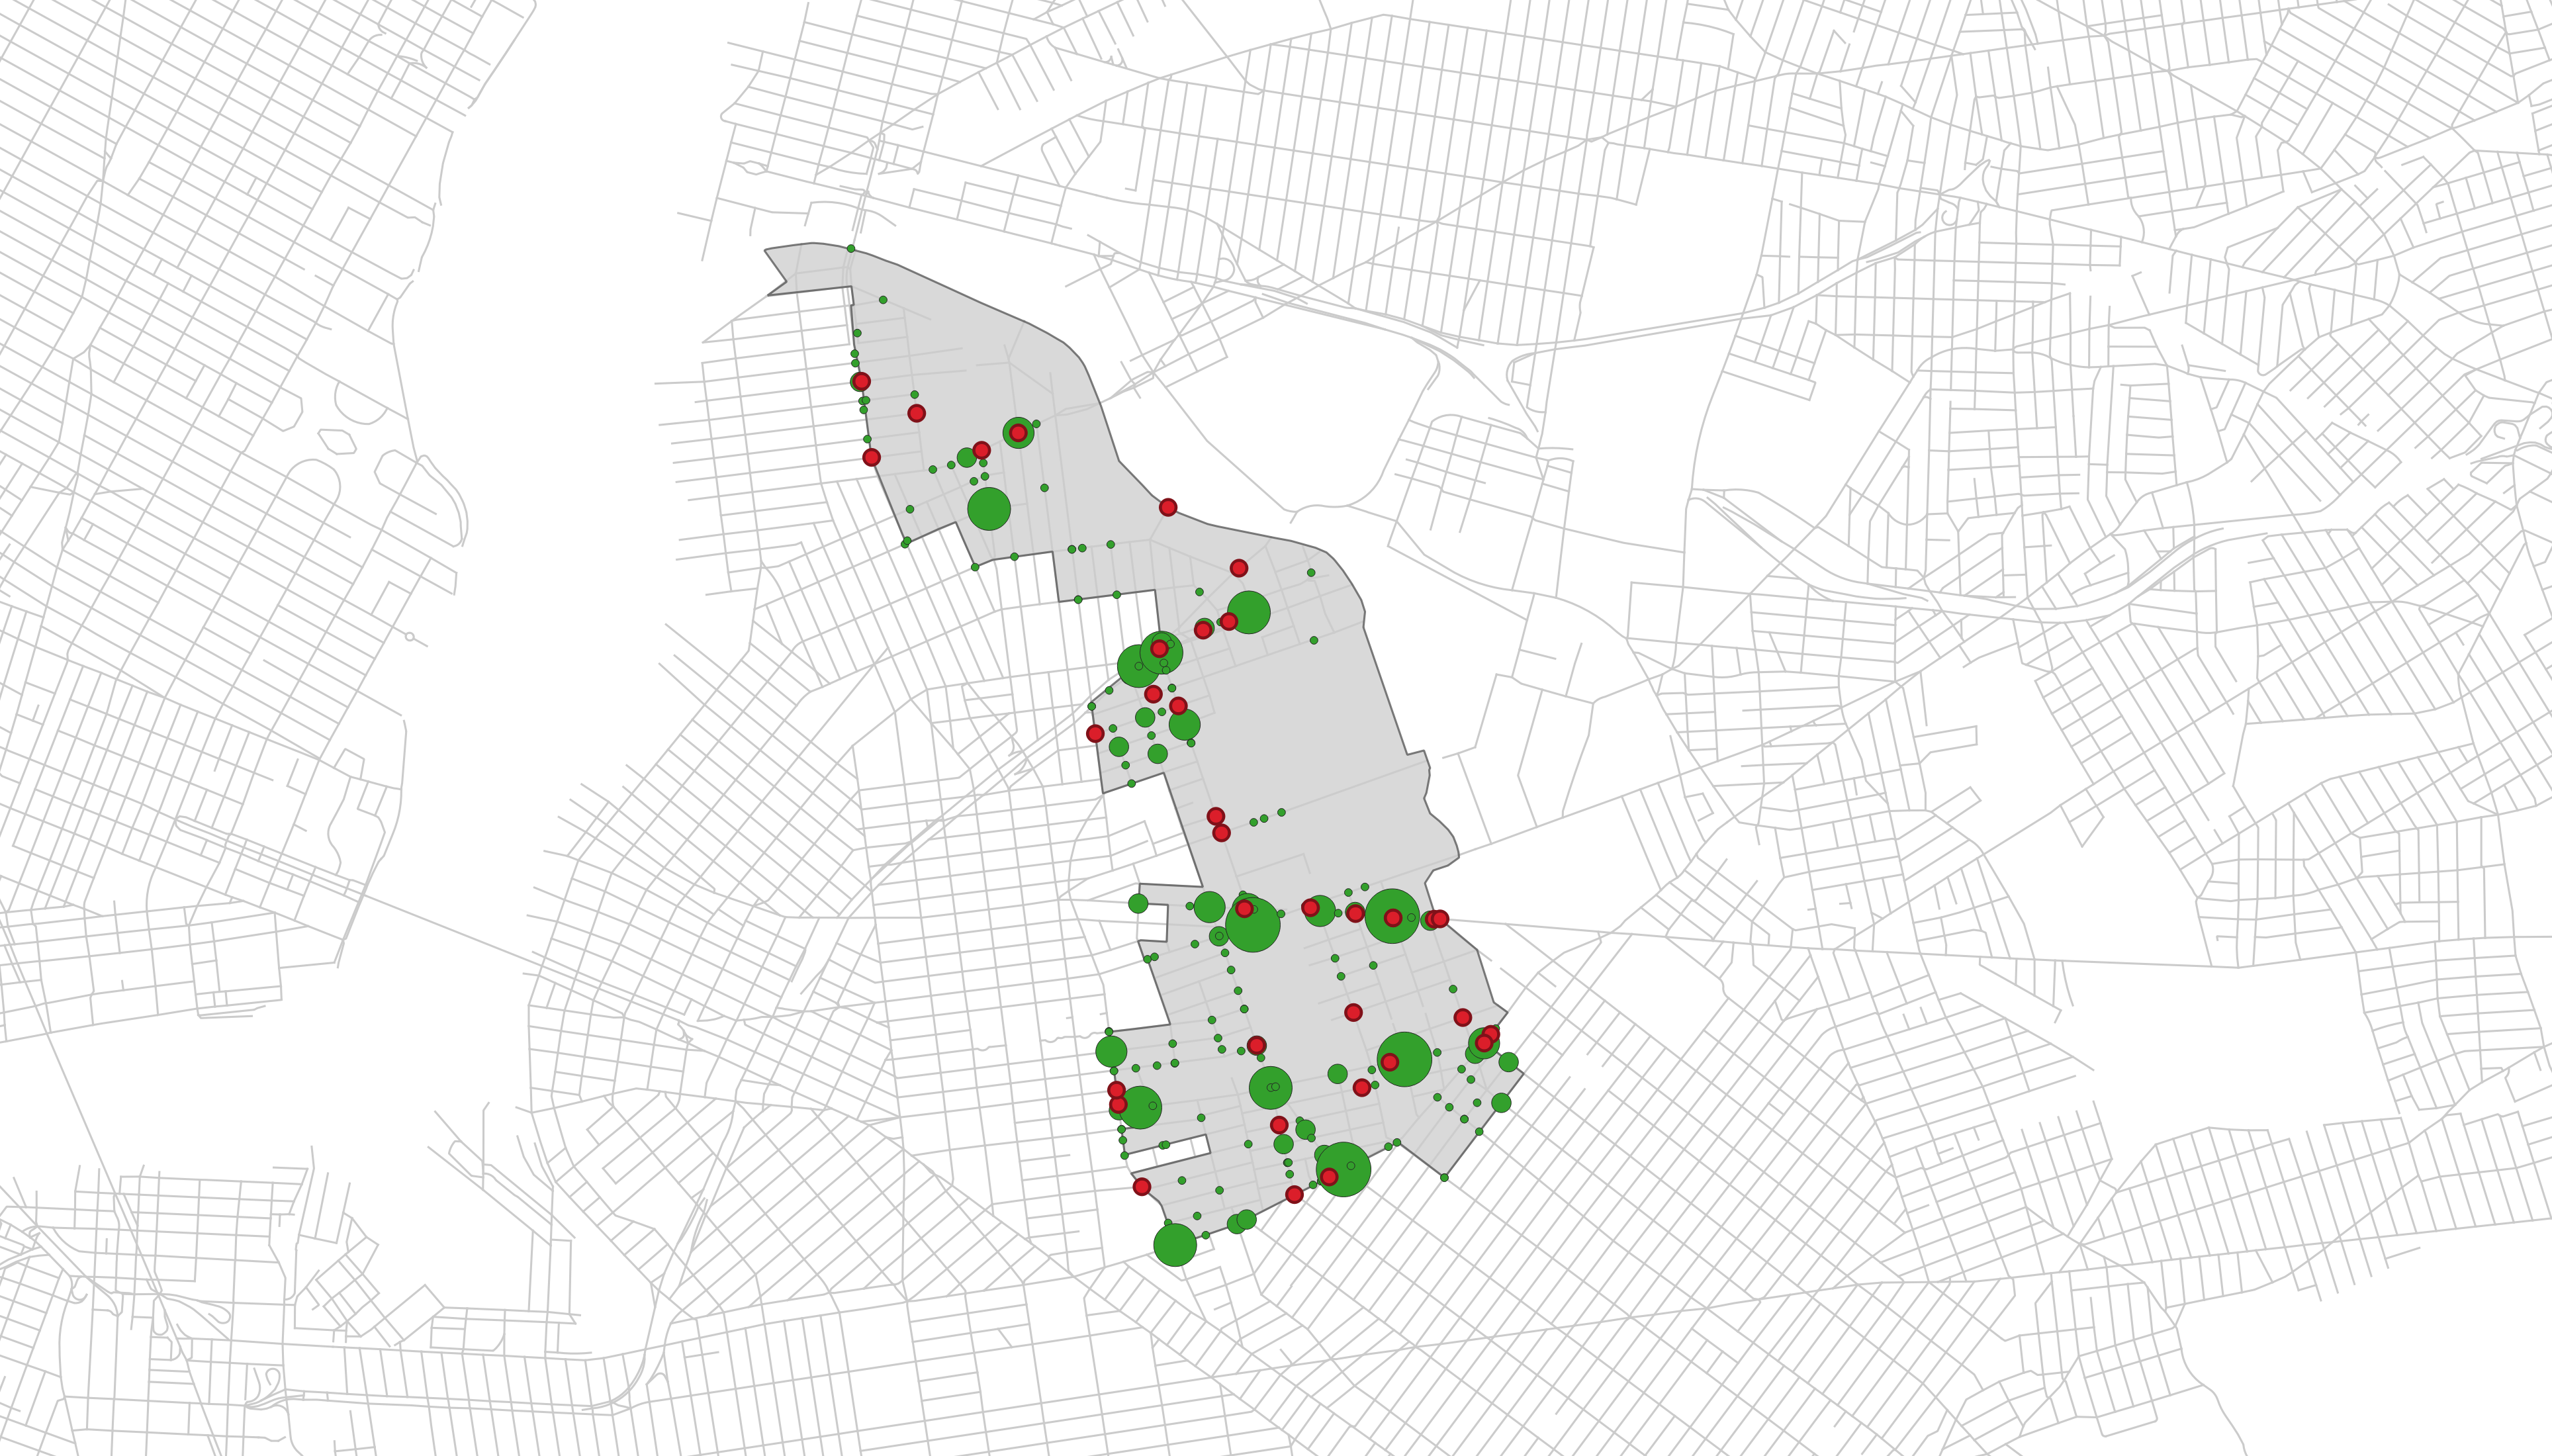

In [31]:
from IPython.display import Image
PATH = "C:\Users\soge\Desktop\Jupyter\Requests\SH\Northern_BK_KSI"
Image(filename = PATH + "\Northern_BK_KSI625.png", width=1000, height=1000)